In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.datasets import load_wine

In [2]:
d = load_wine()
df = pd.DataFrame(data=d['data'],columns=d['feature_names'])
df['target'] = d['target']

In [3]:
# We are going to apply normalization on subset of data so we can visualize this easily.
df = df[['proline','magnesium','alcohol','target']]

In [4]:
df

,proline,magnesium,alcohol,target
0,1065.0,127.0,14.23,0
1,1050.0,100.0,13.20,0
2,1185.0,101.0,13.16,0
3,1480.0,113.0,14.37,0
4,735.0,118.0,13.24,0
...,...,...,...,...
173,740.0,95.0,13.71,2
174,750.0,102.0,13.40,2
175,835.0,120.0,13.27,2
176,840.0,120.0,13.17,2


Text(0.5, 1.0, 'Before Normalization Scaling')

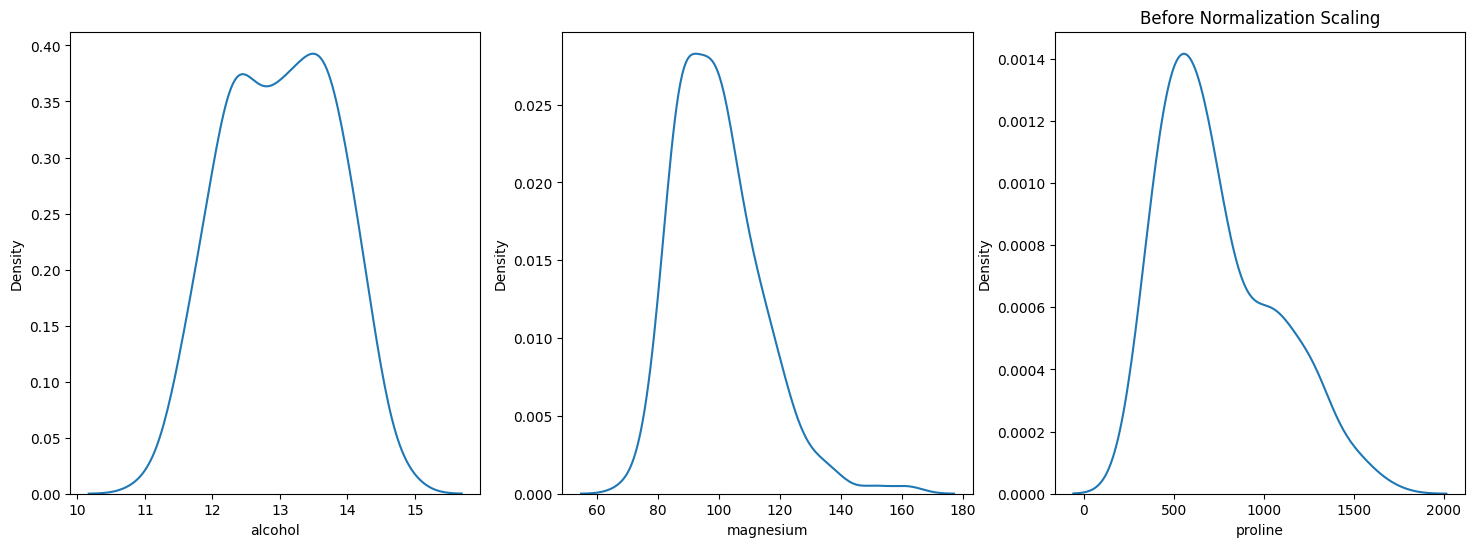

In [5]:
fig, ax = plt.subplots(ncols=3,figsize=(18,6))

sns.kdeplot(df['alcohol'],ax=ax[0])
sns.kdeplot(df['magnesium'], ax=ax[1])
sns.kdeplot(df['proline'], ax=ax[2])

plt.title("Before Normalization Scaling")

Text(0.5, 1.0, 'Scatter plot before Scaling')

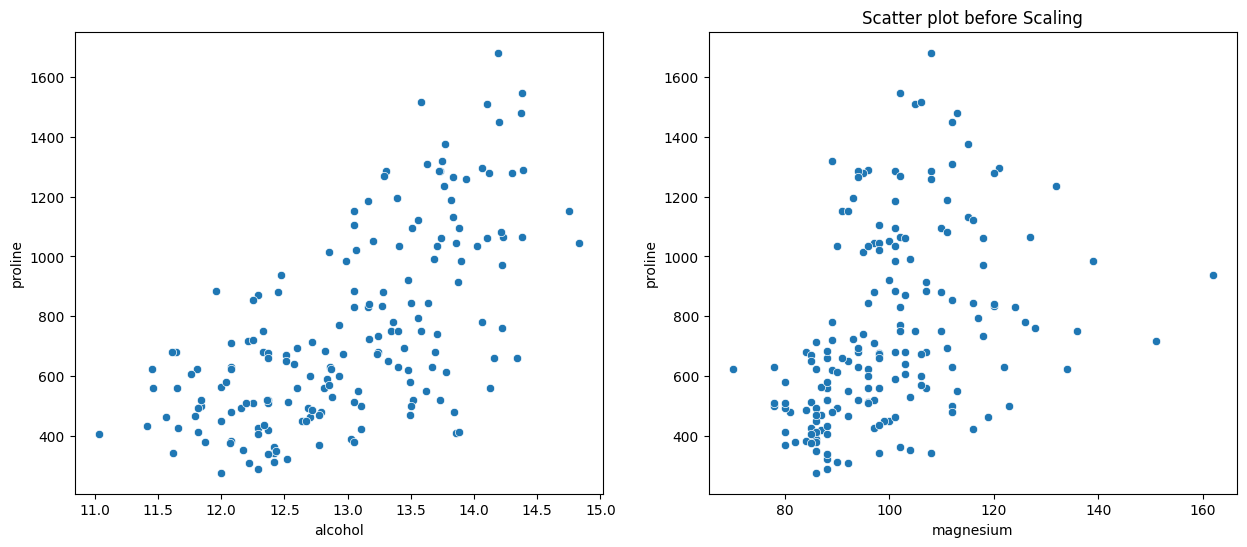

In [6]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=df, x='alcohol', y= 'proline', ax=ax[0])
sns.scatterplot(data=df, x='magnesium', y= 'proline',ax=ax[1])
plt.title('Scatter plot before Scaling')

In [7]:
X = df.iloc[:,:3]

# MinMax Scaler

In [8]:
# Sklearn MinMaxScalar class
minmax = MinMaxScaler()
scaled = minmax.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled, columns=X.columns)

In [9]:
# custom minmax
def minmax(df):
  num = df - df.min()
  den = df.max() - df.min()
  return num/den

In [10]:
minmax(X)

,proline,magnesium,alcohol
0,0.561341,0.619565,0.842105
1,0.550642,0.326087,0.571053
2,0.646933,0.336957,0.560526
3,0.857347,0.467391,0.878947
4,0.325963,0.521739,0.581579
...,...,...,...
173,0.329529,0.271739,0.705263
174,0.336662,0.347826,0.623684
175,0.397290,0.543478,0.589474
176,0.400856,0.543478,0.563158


Text(0.5, 1.0, 'After Normalization Scaling')

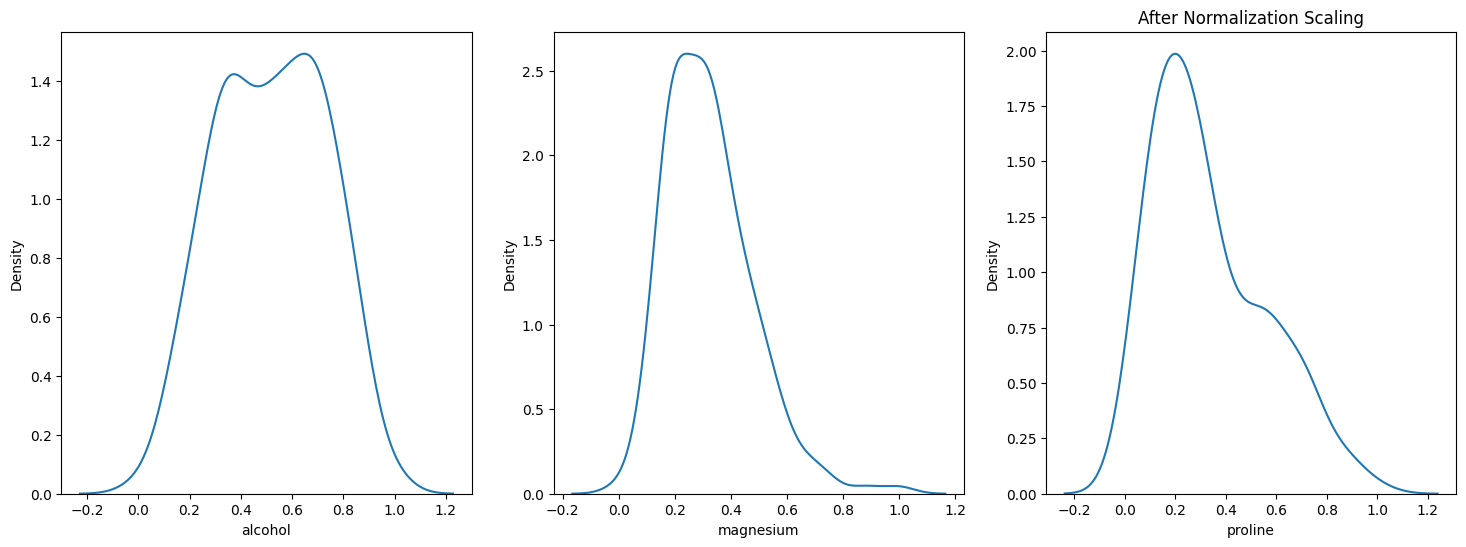

In [11]:
fig, ax = plt.subplots(ncols=3,figsize=(18,6))

sns.kdeplot(scaled_df['magnesium'], ax=ax[1])
sns.kdeplot(scaled_df['alcohol'],ax=ax[0])
sns.kdeplot(scaled_df['proline'], ax=ax[2])

plt.title("After Normalization Scaling")

Text(0.5, 1.0, 'Scatter plot after Scaling')

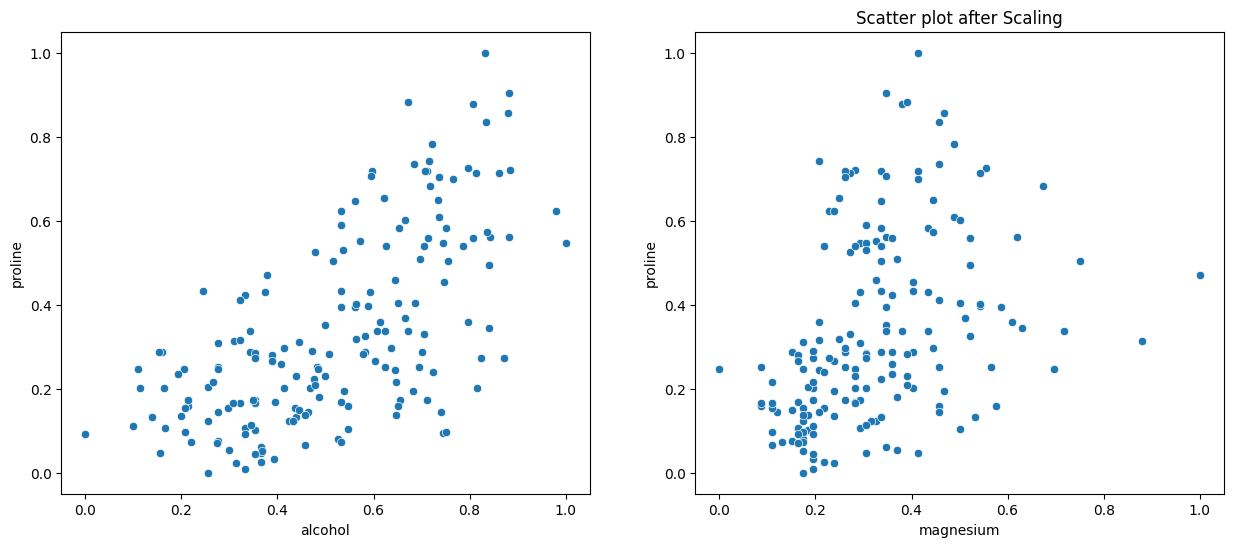

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=scaled_df, x='alcohol', y= 'proline', ax=ax[0])
sns.scatterplot(data=scaled_df, x='magnesium', y= 'proline',ax=ax[1])
plt.title('Scatter plot after Scaling')

As we can see that the data is same as it was before only the scaled has changed.

# Mean Normalization

In [13]:
# Another technique of normalization. No class in sklearn. Not used much instead standardization is used
def mean_normal(df):
  num = df - df.mean()
  den = df.max() - df.min()
  return num/den

In [14]:
mean_df = mean_normal(X)
mean_df

,proline,magnesium,alcohol
0,0.226895,0.296287,0.323522
1,0.216196,0.002809,0.052469
2,0.312487,0.013679,0.041943
3,0.522901,0.144113,0.360364
4,-0.008483,0.198461,0.062995
...,...,...,...
173,-0.004917,-0.051539,0.186679
174,0.002216,0.024548,0.105101
175,0.062844,0.220200,0.070890
176,0.066410,0.220200,0.044574


<Axes: xlabel='magnesium', ylabel='proline'>

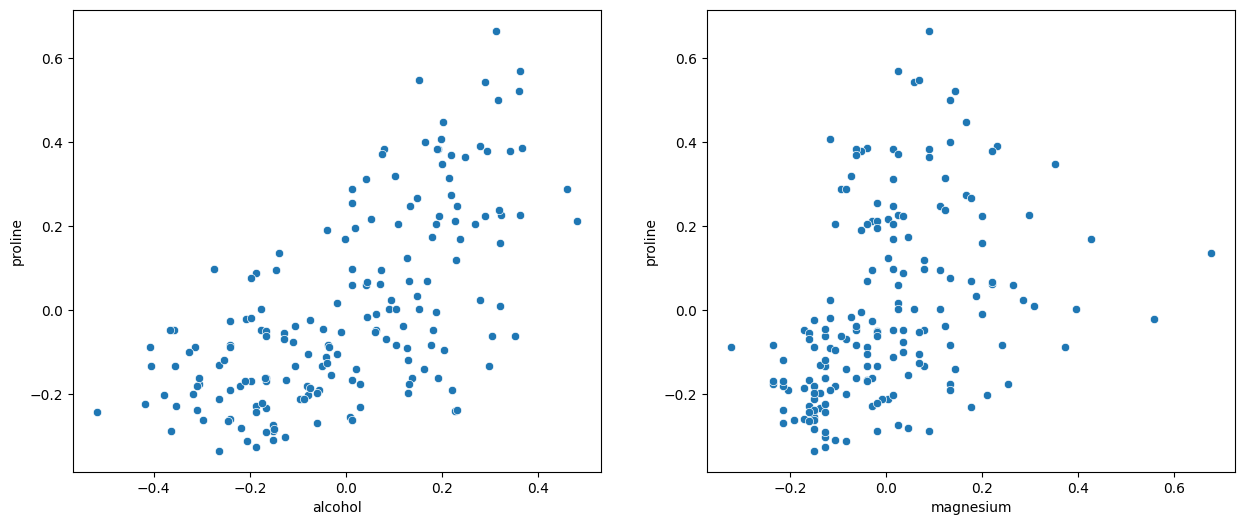

In [15]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=mean_df, x='alcohol', y= 'proline', ax=ax[0])
sns.scatterplot(data=mean_df, x='magnesium', y= 'proline',ax=ax[1])

# Max Absolute Scaling

In [16]:
# Custom function is only for practice
def max_abs_scaling(df):
  return df / abs(df.max())

In [17]:
max_scal = max_abs_scaling(X)
max_scal

,proline,magnesium,alcohol
0,0.633929,0.783951,0.959541
1,0.625000,0.617284,0.890088
2,0.705357,0.623457,0.887390
3,0.880952,0.697531,0.968982
4,0.437500,0.728395,0.892785
...,...,...,...
173,0.440476,0.586420,0.924477
174,0.446429,0.629630,0.903574
175,0.497024,0.740741,0.894808
176,0.500000,0.740741,0.888065


In [18]:
maxabs = MaxAbsScaler()
max_df = maxabs.fit_transform(X)
max_df = pd.DataFrame(data=max_df, columns=X.columns)

<Axes: xlabel='magnesium', ylabel='proline'>

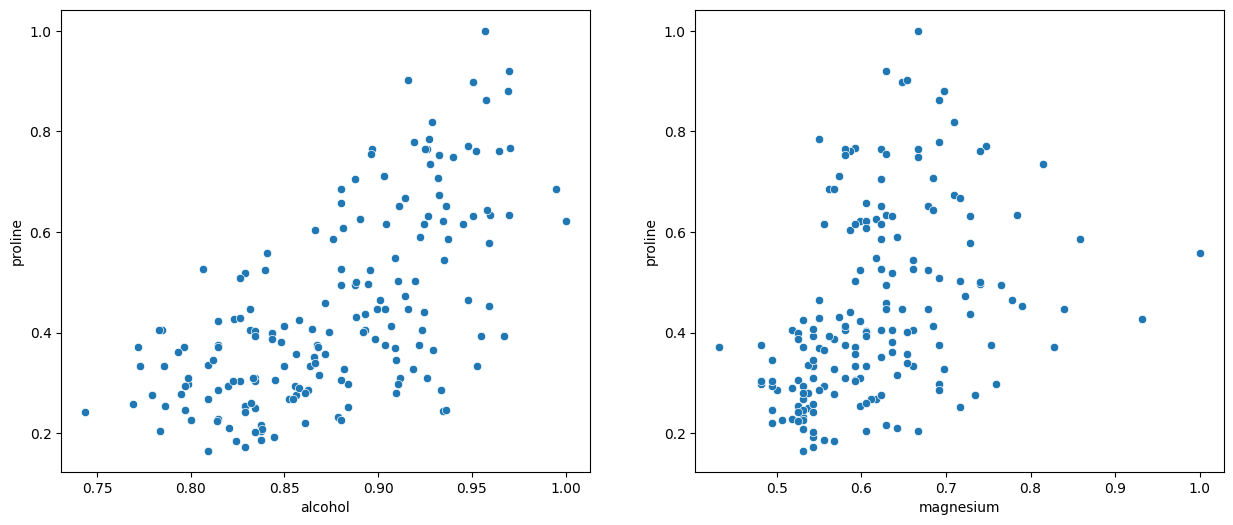

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=max_df, x='alcohol', y= 'proline', ax=ax[0])
sns.scatterplot(data=max_df, x='magnesium', y= 'proline',ax=ax[1])

# Robust Scaling

In [20]:
def robust_scaling(df):
  num = df - df.median()
  den = df.quantile(q=0.75) - df.quantile(q=0.25)
  return num/den

In [21]:
robust_scal = robust_scaling(X)
robust_scal

,proline,magnesium,alcohol
0,0.808050,1.526316,0.897338
1,0.777090,0.105263,0.114068
2,1.055728,0.157895,0.083650
3,1.664603,0.789474,1.003802
4,0.126935,1.052632,0.144487
...,...,...,...
173,0.137255,-0.157895,0.501901
174,0.157895,0.210526,0.266160
175,0.333333,1.157895,0.167300
176,0.343653,1.157895,0.091255


In [22]:
robust_scaling = RobustScaler()
robust_df = robust_scaling.fit_transform(X)
robust_df = pd.DataFrame(data=robust_df, columns=X.columns)
robust_df

,proline,magnesium,alcohol
0,0.808050,1.526316,0.897338
1,0.777090,0.105263,0.114068
2,1.055728,0.157895,0.083650
3,1.664603,0.789474,1.003802
4,0.126935,1.052632,0.144487
...,...,...,...
173,0.137255,-0.157895,0.501901
174,0.157895,0.210526,0.266160
175,0.333333,1.157895,0.167300
176,0.343653,1.157895,0.091255


<Axes: xlabel='magnesium', ylabel='proline'>

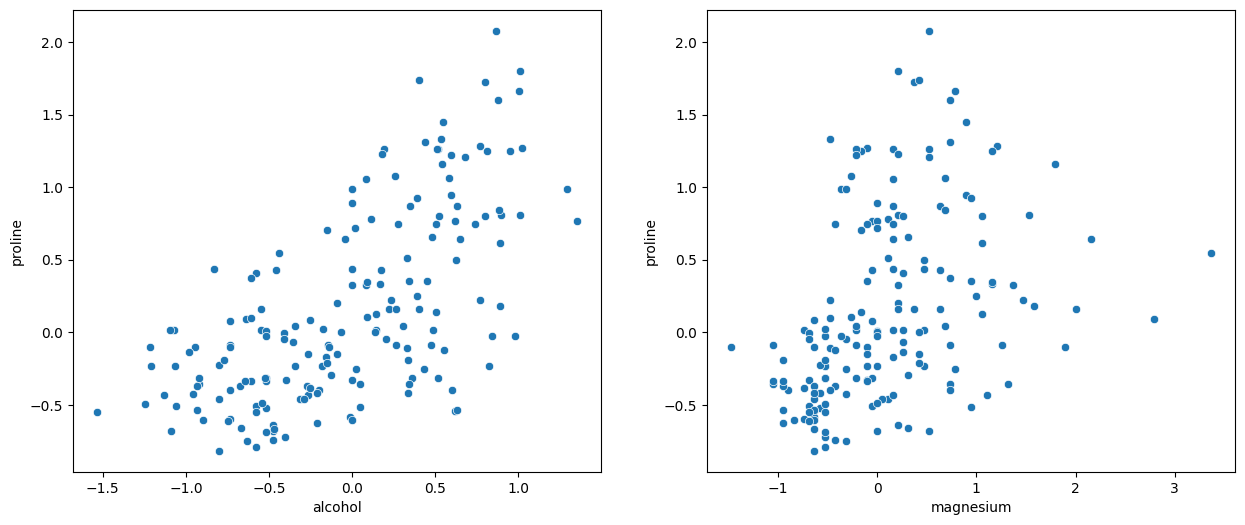

In [23]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=robust_df, x='alcohol', y= 'proline', ax=ax[0])
sns.scatterplot(data=robust_df, x='magnesium', y= 'proline',ax=ax[1])

# Effect of Outlier on MinMax and Robust

In [24]:
out = pd.DataFrame({'proline':5000, 'magnesium':500, 'alcohol':100},index=[1])
out_X = pd.concat([X,out],ignore_index=True)
out_X

,proline,magnesium,alcohol
0,1065.0,127.0,14.23
1,1050.0,100.0,13.20
2,1185.0,101.0,13.16
3,1480.0,113.0,14.37
4,735.0,118.0,13.24
...,...,...,...
174,750.0,102.0,13.40
175,835.0,120.0,13.27
176,840.0,120.0,13.17
177,560.0,96.0,14.13


In [25]:
# Applying MinMax Scalar
minmax = MinMaxScaler()
scaled = minmax.fit_transform(out_X)
scaled_df = pd.DataFrame(data = scaled, columns=out_X.columns)

Text(0.5, 1.0, 'Before and After Scaling')

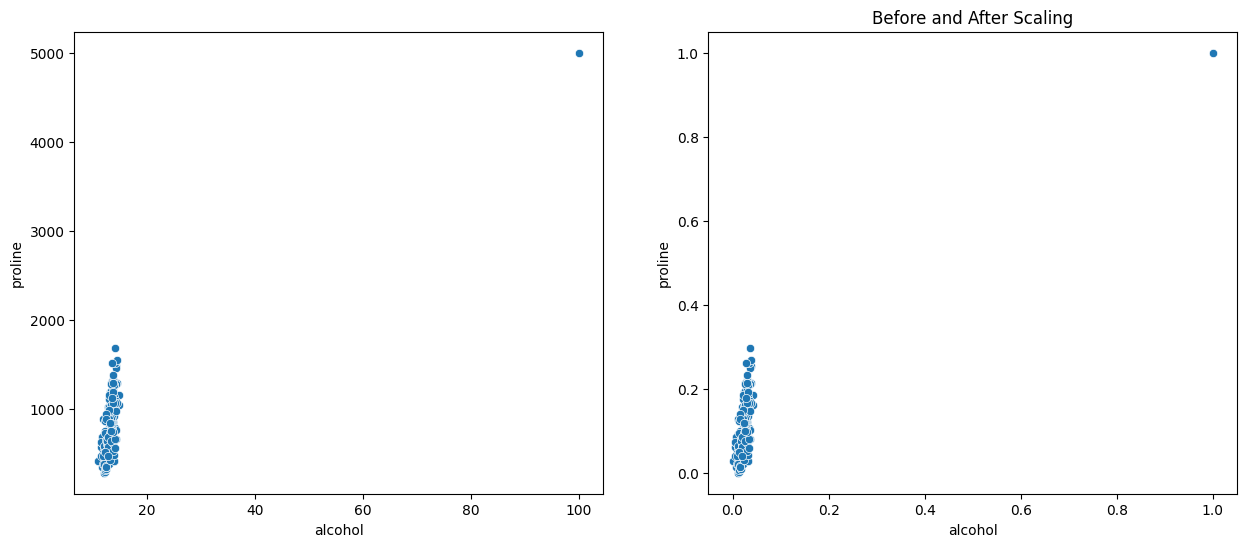

In [26]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=out_X, x='alcohol', y= 'proline',ax=ax[0])
sns.scatterplot(data=scaled_df, x='alcohol', y= 'proline',ax=ax[1])
plt.title('Before and After Scaling')

As we can see normalization has no affect on outliers.

In [27]:
# Applying Robust Scaler
robust_scaling = RobustScaler()
robust_df = robust_scaling.fit_transform(out_X)
robust_df = pd.DataFrame(data=robust_df, columns=X.columns)
robust_df

,proline,magnesium,alcohol
0,0.801644,1.487179,0.893939
1,0.770812,0.102564,0.113636
2,1.048304,0.153846,0.083333
3,1.654676,0.769231,1.000000
4,0.123330,1.025641,0.143939
...,...,...,...
174,0.154162,0.205128,0.265152
175,0.328880,1.128205,0.166667
176,0.339157,1.128205,0.090909
177,-0.236382,-0.102564,0.818182


Text(0.5, 1.0, 'Before and After Scaling')

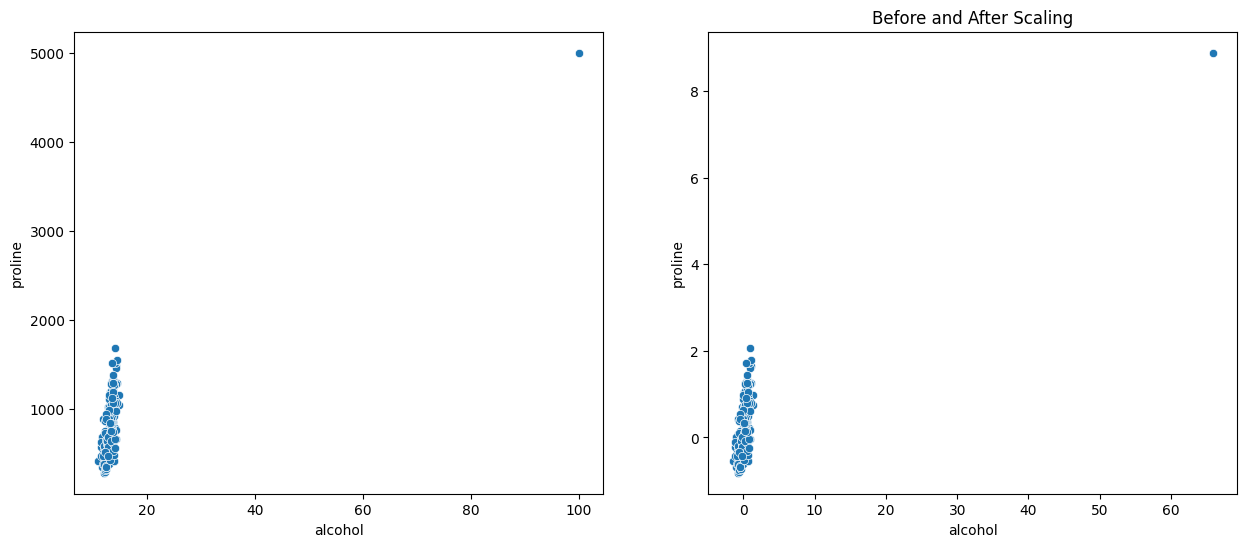

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

sns.scatterplot(data=out_X, x='alcohol', y= 'proline',ax=ax[0])
sns.scatterplot(data=robust_df, x='alcohol', y= 'proline',ax=ax[1])
plt.title('Before and After Scaling')

Robust Scaling has scaled the outlier from 100 to 70